#### A couple examples for how to use Julia/Ripserer to analyze the topology of a set of points or a network

Make sure your Kernal is set to Julia with the following dependencies installed:

In [2]:
## dependencies (run this first)
using LinearAlgebra # idk the internet said to use it
using SparseArrays # network examples
using DataFrames # store point file
using Ripserer # julia ripser port (analyze Vietoris Rips Complex topology)
using Plots # pretty pictures
using CSV # read point files

SyntaxError: invalid syntax (3086206626.py, line 2)

#### 2D Point Set Example (Points CSV 2)
Pull points CSV 2 and find homology.

We also look for representative cycles and visualize them at a number of periods

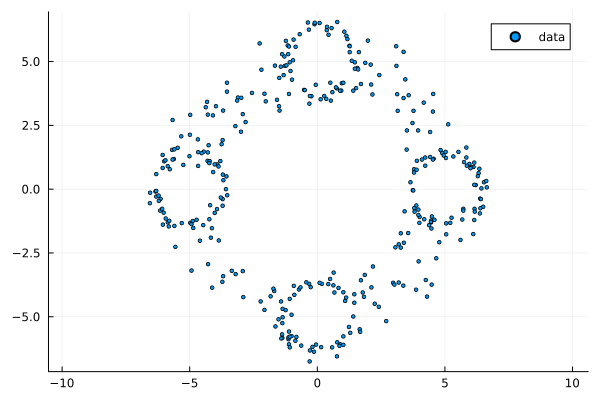

In [ ]:
# Data
data = Tuple.(eachrow(CSV.read("datasets/CCMathTopologyScavengerHunt/points2.csv", DataFrame; header=false))) # read files and turn it into a vector of tuples (from dataframe)
scatter(data; label="data", markersize=2, aspect_ratio=1)

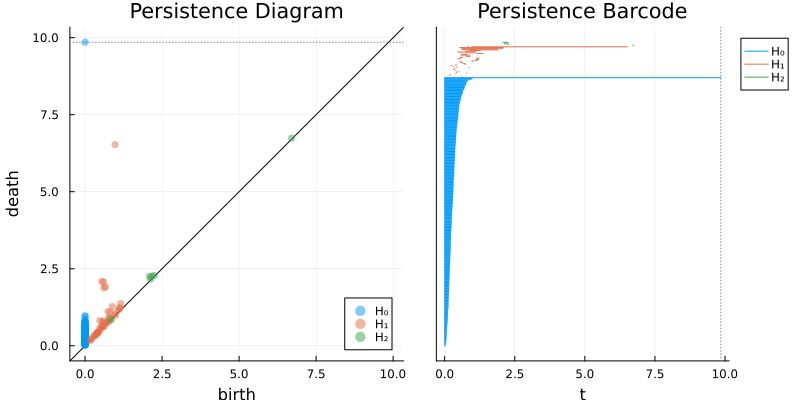

In [ ]:
# solve basic homology features
diagram = ripserer(data; dim_max=2)
plot(plot(diagram), barcode(diagram); size = (800, 400))

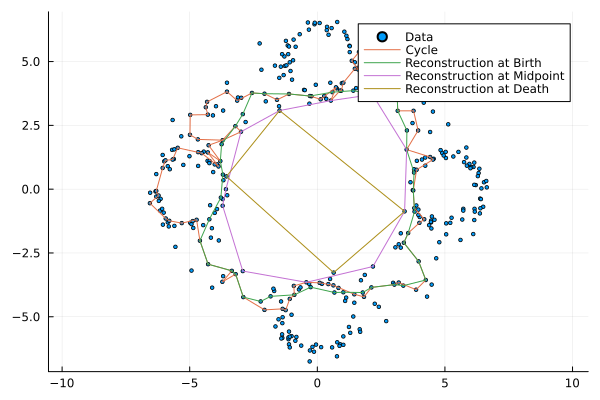

In [ ]:
## show representative cycles for the final cycle to die
diagram_cocycles = ripserer(data; reps=true)
most_persistent_co = diagram_cocycles[2][end]
filtration = diagram_cocycles[2].filtration
diagram_cycles = ripserer(data; alg=:involuted)
most_persistent_ho = diagram_cycles[2][end]

scatter(data; label="Data", markersize=2, aspect_ratio=1)
plot!(most_persistent_ho, data; label="Cycle")
plot!(
    reconstruct_cycle(filtration, most_persistent_co), # reconstruct at birth
    data;
    label="Reconstruction at Birth"
)
plot!(
    reconstruct_cycle(filtration, most_persistent_co, (death(most_persistent_co) - birth(most_persistent_co)) / 2), # solve midpoint and reconstruct at midpoint
    data;
    label="Reconstruction at Midpoint"
)
plot!(
    reconstruct_cycle(filtration, most_persistent_co, death(most_persistent_co) - 0.01), # reconstruct at death
    data;
    label="Reconstruction at Death",
)

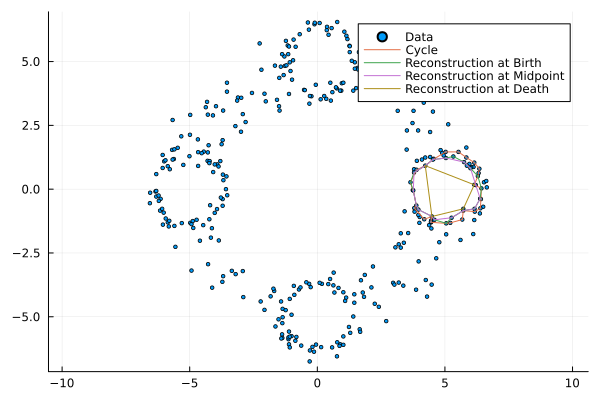

In [ ]:
## show representative cycles for an abritrary cycle
i = 2 # number of cycles who die after the one you want

diagram_cocycles = ripserer(data; reps=true)
co_of_interest = diagram_cocycles[2][end-i]
diagram_cycles = ripserer(data; alg=:involuted) # might be a more efficient way to do this instead of doing it twice
ho_of_interest = diagram_cycles[2][end-i]
filtration = diagram_cocycles[2].filtration

scatter(data; label="Data", markersize=2, aspect_ratio=1)
plot!(ho_of_interest, data; label="Cycle")
plot!(
    reconstruct_cycle(filtration, co_of_interest), # reconstruct at birth
    data;
    label="Reconstruction at Birth"
)
plot!(
    reconstruct_cycle(filtration, co_of_interest, (death(co_of_interest) - birth(co_of_interest)) / 2), # solve midpoint and reconstruct at midpoint
    data;
    label="Reconstruction at Midpoint"
)
plot!(
    reconstruct_cycle(filtration, co_of_interest, death(co_of_interest) - 0.01), # reconstruct at death
    data;
    label="Reconstruction at Death",
)


#### 3D Point Set Example (Points CSV 13)
Pull points CSV 13 and find homology.

We also look for representative cycles and visualize them at a number of periods

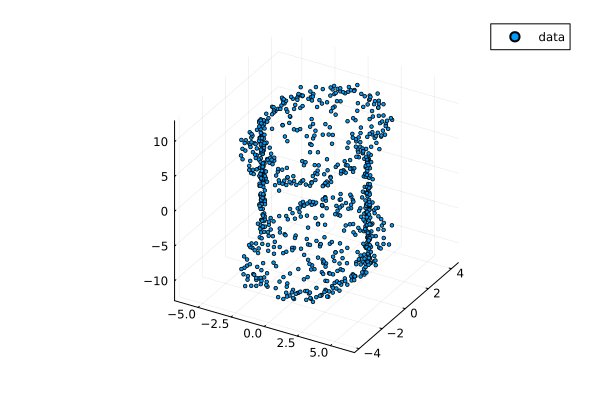

In [ ]:
# Data
data = Tuple.(eachrow(CSV.read("datasets/CCMathTopologyScavengerHunt/points13.csv", DataFrame; header=false))) # read files and turn it into a vector of tuples (from dataframe)
scatter3d(data; label="data", markersize=2, aspect_ratio=1) # hard to see, but two balls connected by lines

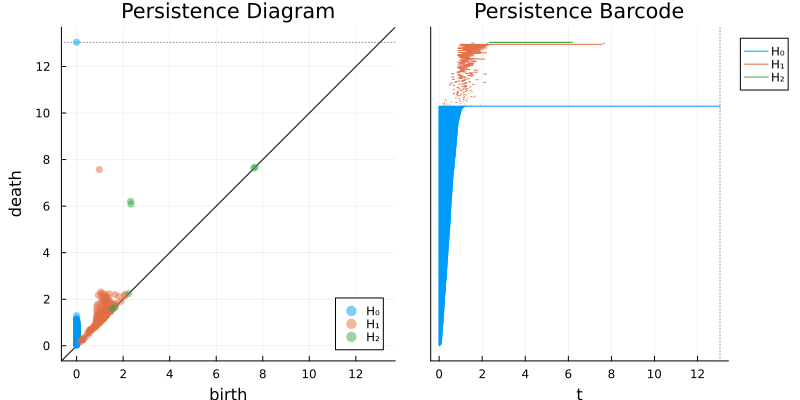

In [ ]:
# solve basic homology features
diagram = ripserer(data; dim_max=2)
plot(plot(diagram), barcode(diagram); size = (800, 400))

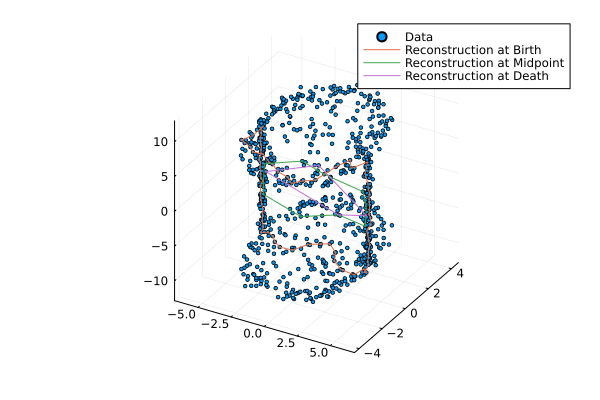

In [ ]:
## show representative cycles for the final cycle to die
diagram_cocycles = ripserer(data; reps=true)
most_persistent_co = diagram_cocycles[2][end]
filtration = diagram_cocycles[2].filtration

scatter(data; label="Data", markersize=2, aspect_ratio=1)
plot!(
    reconstruct_cycle(filtration, most_persistent_co), # reconstruct at birth
    data;
    label="Reconstruction at Birth"
)
plot!(
    reconstruct_cycle(filtration, most_persistent_co, (death(most_persistent_co) - birth(most_persistent_co)) / 2), # solve midpoint and reconstruct at midpoint
    data;
    label="Reconstruction at Midpoint"
)
plot!(
    reconstruct_cycle(filtration, most_persistent_co, death(most_persistent_co) - 0.01), # reconstruct at death
    data;
    label="Reconstruction at Death",
)

## I assume you could do this for voids by adding a dim_max=2 argument
# in the original call and using 3 as the cocyle and filtration index,
# but this already takes a long time and I don't wanna

## Network Example
Use a constructed network to test homology.

The network never fills up (we use a sparse matrix) so there should be a hole at the end

In [ ]:
## Expand to see the network progression
#=
The network goes:
0:
  o   o
 
o       o

  o   o

1:
  o   o
 
o       o
 \
  o   o

2:
  o   o
       \
o       o
 \
  o   o

3:
  o - o
       \
o       o
 \     
  o   o

4:
  o - o
       \
o       o
 \     /
  o   o

5:
  o - o
       \
o       o
 \     /
  o - o

6: (Hole Emerges)
  o - o
 /     \
o       o
 \     /
  o - o

7: (Hole splits into two)
  o - o
 /   / \
o   /   o
 \ /   /
  o - o

8: (1 hole closes)
  o - o
 /   / \
o   / _ o
 \ //  /
  o - o

Where 1 hole remains at the end
=#

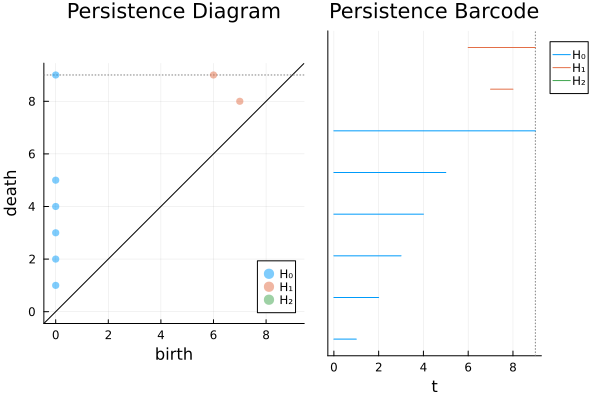

In [ ]:
adj = [0 1 0 0 0 6;
       1 0 5 8 7 0;
       0 5 0 4 0 0;
       0 8 4 0 2 0;
       0 7 0 2 0 3;
       6 0 0 0 3 0]
adj = sparse(adj)

res = ripserer(adj; dim_max=2, threshold=maximum(adj)+1, sparse=true)
plot(plot(res), barcode(res))

In [ ]:
## show representative cycles for an abritrary cycle
i = 0 # number of cycles who die after the one you want

diagram_cycles = ripserer(adj; alg=:involuted) # might be a more efficient way to do this instead of doing it twice
ho_of_interest = diagram_cycles[2][end-i]

println("Cycle: ")
ho_of_interest

# can use same code above to get it at the end and midpoint, start breaks tho (idk why yet)

Cycle: 


[6.0, ∞) with:
 birth_simplex: Simplex{1, Int64, Int64}
 death_simplex: Nothing
 representative: 1-element Chain{Mod{2},Simplex{1, Int64, Int64}}